<h2>3<sup>η</sup> ΕΡΓΑΣΤΗΡΙΑΚΗ ΑΣΚΗΣΗ</h2>
<h3>Γενετικοί Αλγόριθμοι & Επιδημιολογικά Μοντέλα</h3>
<p style=text-align:justify>Στην παρούσα άσκηση εξοικειωθείτε με την χρήση των γενετικών αλγορίθμων και την επιλογή των παραμέτρων τους. Επιπλέον, θα αναπτύξετε ένα γενετικό αλγόριθμο για τον εντοπισμό κοινοτήτων σε δίκτυα και θα συγκρίνετε το αποτέλεσμά του με τους συμβατικούς αλγόριθμους εντοπισμού κοινοτήτων που εφαρμόστηκαν στην 2<sup>η</sup> εργαστηριακή άσκηση. Τέλος θα εξοικειωθείτε με τα βασικά επιδημιολογικά μοντέλα SIR, SIS.</p>

In [1]:
%matplotlib inline

import matplotlib
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import random
from scipy.integrate import odeint

## ΜΕΡΟΣ Α

### Άσκηση 1: Εξοικείωση με Γενετικούς Αλγόριθμους

#### Πρόβλημα ONEMAX

Βρείτε την δυαδική ακολουθία $(x_1, x_2, ..., x_n)$ που μεγιστοποιεί το άθροισμα $x_1 + x_2 + ... + x_n, n=20$. Αναλύστε την επίδραση του μεγέθους του πληθυσμού, της πιθανότητας διασταύρωσης (crossover) και της πιθανότητας μετάλλαξης (mutation) στην ποιότητα της λύσης (πόσο κοντά είναι στην προφανή βέλτιστη λύση) που προκύπτει από το γενετικό αλγόριθμο. Συγκεκριμένα, μεταβάλλετε τον πληθυσμό από $10$ ως $100$ χρωμοσώματα με βήμα $10$,την πιθανότητα διασταύρωσης από $0.3$ ως $0.9$ με βήμα $0.1$ και την πιθανότητα μετάλλαξης από $0.01$ ως $0.2$ με βήμα $0.01$. Εξετάστε την ποιότητα της λύσης του γενετικού αλγορίθμου καθώς αλλάζετε τις παραμέτρους. Ελιτισμό μπορείτε να χρησιμοποιήσετε αν το επιθυμείτε.

In [2]:
def create_population(n,m):
    return [[random.randint(0, 1) for i in range(n)] for j in range(m)]

def find_fitness(p):
    return [sum(p[i])/20 for i in range(len(p))]

def proportional_selection(p,cros,mut):
    # Select chromosomes to pass to next population proportionally to their fitness
    f = find_fitness(p)
    elit = np.argsort(f)[-3:]
    elit = [p[i] for i in elit]
    for i in range(len(elit)):
        p.remove(elit[i])
    p = crossover(p,cros)
    p = mutation(p,mut)
    p = elit+p
    return p

def crossover(p,cros):
    # Apply crossover to population
    for i in range(len(p)):
        if (random.random() < cros):
            a = random.randint(0,len(p)-1)
            b = random.randint(0,len(p)-1)
            c = random.randint(0,len(p[0])-1)
            p1 = p[a][:c] + p[b][c:]
            p2 = p[b][:c] + p[a][c:]
            p[a] = p1
            p[b] = p2
        else:
            next
    return p

def mutation(p,mut):
    # Apply mutation to population
    for i in range(len(p)):
        if (random.random() < mut):
            a = random.randint(0,len(p)-1)
            b = random.randint(0,len(p[0])-1)
            p[a][b] = 1 - p[a][b]
        else:
            next
    return p

def genetic_algorithm(n,population,epoch,cros,mut):
    p = create_population(n,population)
    for i in range(epoch):
        p = proportional_selection(p,cros,mut)
    f = find_fitness(p)
    return p[f.index(max(f))],max(f)

In [3]:
best_f = -1
for population in range(10,110,10):
    for crossover_ in np.arange(0.3,1.0,0.1):
        for mutation_ in np.arange(0.01,0.21,0.01):
            p,f = genetic_algorithm(20,population,1000,crossover_,mutation_)
            print("Population: "+str(population)+", Crossover: "+str(crossover_)+", Mutation: "+str(mutation_))
            print("Best Chromosome: ",p,", with fitness: ",f,"\n")
            if best_f < f:
                best_f = f
                best_p = p
                pop = population
                c = crossover_
                m = mutation_

print ("Best Combination of Parameters: Population =",pop,"Crossover =",c,"Mutation =",m)
print ("Best Chromosome:",best_p,", with fitness:",best_f)

Population: 10, Crossover: 0.3, Mutation: 0.01
Best Chromosome:  [0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1] , with fitness:  0.8 

Population: 10, Crossover: 0.3, Mutation: 0.02
Best Chromosome:  [0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1] , with fitness:  0.8 

Population: 10, Crossover: 0.3, Mutation: 0.03
Best Chromosome:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1] , with fitness:  0.8 

Population: 10, Crossover: 0.3, Mutation: 0.04
Best Chromosome:  [1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0] , with fitness:  0.8 

Population: 10, Crossover: 0.3, Mutation: 0.05
Best Chromosome:  [1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1] , with fitness:  0.8 

Population: 10, Crossover: 0.3, Mutation: 0.060000000000000005
Best Chromosome:  [1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1] , with fitness:  0.8 

Population: 10, Crossover: 0.3, Mutation: 0.06999999999999999
Best Chromosome:  [1, 1, 1, 

Population: 10, Crossover: 0.5, Mutation: 0.16
Best Chromosome:  [1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1] , with fitness:  0.85 

Population: 10, Crossover: 0.5, Mutation: 0.17
Best Chromosome:  [1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1] , with fitness:  0.9 

Population: 10, Crossover: 0.5, Mutation: 0.18000000000000002
Best Chromosome:  [1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] , with fitness:  0.9 

Population: 10, Crossover: 0.5, Mutation: 0.19
Best Chromosome:  [1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1] , with fitness:  0.85 

Population: 10, Crossover: 0.5, Mutation: 0.2
Best Chromosome:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1] , with fitness:  0.95 

Population: 10, Crossover: 0.6000000000000001, Mutation: 0.01
Best Chromosome:  [1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1] , with fitness:  0.85 

Population: 10, Crossover: 0.6000000000000001, Mutation: 0.02
Best Chromo

Population: 10, Crossover: 0.8000000000000003, Mutation: 0.09
Best Chromosome:  [1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1] , with fitness:  0.85 

Population: 10, Crossover: 0.8000000000000003, Mutation: 0.09999999999999999
Best Chromosome:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0] , with fitness:  0.85 

Population: 10, Crossover: 0.8000000000000003, Mutation: 0.11
Best Chromosome:  [1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1] , with fitness:  0.8 

Population: 10, Crossover: 0.8000000000000003, Mutation: 0.12
Best Chromosome:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1] , with fitness:  0.9 

Population: 10, Crossover: 0.8000000000000003, Mutation: 0.13
Best Chromosome:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1] , with fitness:  0.95 

Population: 10, Crossover: 0.8000000000000003, Mutation: 0.14
Best Chromosome:  [1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] , with fitness:  0.85

Population: 20, Crossover: 0.3, Mutation: 0.2
Best Chromosome:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1] , with fitness:  0.9 

Population: 20, Crossover: 0.4, Mutation: 0.01
Best Chromosome:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0] , with fitness:  0.85 

Population: 20, Crossover: 0.4, Mutation: 0.02
Best Chromosome:  [1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0] , with fitness:  0.8 

Population: 20, Crossover: 0.4, Mutation: 0.03
Best Chromosome:  [1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] , with fitness:  0.85 

Population: 20, Crossover: 0.4, Mutation: 0.04
Best Chromosome:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0] , with fitness:  0.85 

Population: 20, Crossover: 0.4, Mutation: 0.05
Best Chromosome:  [1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] , with fitness:  0.85 

Population: 20, Crossover: 0.4, Mutation: 0.060000000000000005
Best Chromosome:  [1, 1, 0, 1, 1, 0, 1, 

Population: 20, Crossover: 0.6000000000000001, Mutation: 0.13
Best Chromosome:  [1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1] , with fitness:  0.9 

Population: 20, Crossover: 0.6000000000000001, Mutation: 0.14
Best Chromosome:  [1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0] , with fitness:  0.85 

Population: 20, Crossover: 0.6000000000000001, Mutation: 0.15000000000000002
Best Chromosome:  [0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1] , with fitness:  0.85 

Population: 20, Crossover: 0.6000000000000001, Mutation: 0.16
Best Chromosome:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1] , with fitness:  0.9 

Population: 20, Crossover: 0.6000000000000001, Mutation: 0.17
Best Chromosome:  [1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] , with fitness:  0.95 

Population: 20, Crossover: 0.6000000000000001, Mutation: 0.18000000000000002
Best Chromosome:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1] , with

Population: 20, Crossover: 0.9000000000000001, Mutation: 0.02
Best Chromosome:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1] , with fitness:  0.85 

Population: 20, Crossover: 0.9000000000000001, Mutation: 0.03
Best Chromosome:  [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1] , with fitness:  0.85 

Population: 20, Crossover: 0.9000000000000001, Mutation: 0.04
Best Chromosome:  [1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] , with fitness:  0.9 

Population: 20, Crossover: 0.9000000000000001, Mutation: 0.05
Best Chromosome:  [1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] , with fitness:  0.9 

Population: 20, Crossover: 0.9000000000000001, Mutation: 0.060000000000000005
Best Chromosome:  [0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] , with fitness:  0.85 

Population: 20, Crossover: 0.9000000000000001, Mutation: 0.06999999999999999
Best Chromosome:  [1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1] , wit

Population: 30, Crossover: 0.4, Mutation: 0.14
Best Chromosome:  [1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] , with fitness:  0.85 

Population: 30, Crossover: 0.4, Mutation: 0.15000000000000002
Best Chromosome:  [0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1] , with fitness:  0.85 

Population: 30, Crossover: 0.4, Mutation: 0.16
Best Chromosome:  [1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] , with fitness:  0.9 

Population: 30, Crossover: 0.4, Mutation: 0.17
Best Chromosome:  [1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] , with fitness:  0.95 

Population: 30, Crossover: 0.4, Mutation: 0.18000000000000002
Best Chromosome:  [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1] , with fitness:  0.9 

Population: 30, Crossover: 0.4, Mutation: 0.19
Best Chromosome:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1] , with fitness:  0.9 

Population: 30, Crossover: 0.4, Mutation: 0.2
Best Chromosome:  [0, 1, 1,

Population: 30, Crossover: 0.7000000000000002, Mutation: 0.060000000000000005
Best Chromosome:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1] , with fitness:  0.9 

Population: 30, Crossover: 0.7000000000000002, Mutation: 0.06999999999999999
Best Chromosome:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1] , with fitness:  0.95 

Population: 30, Crossover: 0.7000000000000002, Mutation: 0.08
Best Chromosome:  [1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] , with fitness:  0.85 

Population: 30, Crossover: 0.7000000000000002, Mutation: 0.09
Best Chromosome:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0] , with fitness:  0.95 

Population: 30, Crossover: 0.7000000000000002, Mutation: 0.09999999999999999
Best Chromosome:  [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] , with fitness:  0.95 

Population: 30, Crossover: 0.7000000000000002, Mutation: 0.11
Best Chromosome:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0

Population: 30, Crossover: 0.9000000000000001, Mutation: 0.15000000000000002
Best Chromosome:  [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1] , with fitness:  0.9 

Population: 30, Crossover: 0.9000000000000001, Mutation: 0.16
Best Chromosome:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1] , with fitness:  0.95 

Population: 30, Crossover: 0.9000000000000001, Mutation: 0.17
Best Chromosome:  [1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] , with fitness:  0.9 

Population: 30, Crossover: 0.9000000000000001, Mutation: 0.18000000000000002
Best Chromosome:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0] , with fitness:  0.9 

Population: 30, Crossover: 0.9000000000000001, Mutation: 0.19
Best Chromosome:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1] , with fitness:  0.95 

Population: 30, Crossover: 0.9000000000000001, Mutation: 0.2
Best Chromosome:  [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1] , with f

Population: 40, Crossover: 0.5, Mutation: 0.08
Best Chromosome:  [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] , with fitness:  0.9 

Population: 40, Crossover: 0.5, Mutation: 0.09
Best Chromosome:  [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1] , with fitness:  0.85 

Population: 40, Crossover: 0.5, Mutation: 0.09999999999999999
Best Chromosome:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1] , with fitness:  0.9 

Population: 40, Crossover: 0.5, Mutation: 0.11
Best Chromosome:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1] , with fitness:  0.9 

Population: 40, Crossover: 0.5, Mutation: 0.12
Best Chromosome:  [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] , with fitness:  0.95 

Population: 40, Crossover: 0.5, Mutation: 0.13
Best Chromosome:  [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1] , with fitness:  0.9 

Population: 40, Crossover: 0.5, Mutation: 0.14
Best Chromosome:  [1, 1, 1, 0, 1, 1, 1, 1,

Population: 40, Crossover: 0.7000000000000002, Mutation: 0.18000000000000002
Best Chromosome:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1] , with fitness:  0.95 

Population: 40, Crossover: 0.7000000000000002, Mutation: 0.19
Best Chromosome:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1] , with fitness:  0.9 

Population: 40, Crossover: 0.7000000000000002, Mutation: 0.2
Best Chromosome:  [1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1] , with fitness:  0.9 

Population: 40, Crossover: 0.8000000000000003, Mutation: 0.01
Best Chromosome:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1] , with fitness:  0.9 

Population: 40, Crossover: 0.8000000000000003, Mutation: 0.02
Best Chromosome:  [1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0] , with fitness:  0.9 

Population: 40, Crossover: 0.8000000000000003, Mutation: 0.03
Best Chromosome:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1] , with fitness:  0.9 

P

Population: 50, Crossover: 0.3, Mutation: 0.08
Best Chromosome:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1] , with fitness:  0.9 

Population: 50, Crossover: 0.3, Mutation: 0.09
Best Chromosome:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1] , with fitness:  0.9 

Population: 50, Crossover: 0.3, Mutation: 0.09999999999999999
Best Chromosome:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1] , with fitness:  0.95 

Population: 50, Crossover: 0.3, Mutation: 0.11
Best Chromosome:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1] , with fitness:  0.9 

Population: 50, Crossover: 0.3, Mutation: 0.12
Best Chromosome:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1] , with fitness:  0.95 

Population: 50, Crossover: 0.3, Mutation: 0.13
Best Chromosome:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0] , with fitness:  0.95 

Population: 50, Crossover: 0.3, Mutation: 0.14
Best Chromosome:  [1, 1, 1, 1, 1, 0, 1, 1

Population: 50, Crossover: 0.6000000000000001, Mutation: 0.02
Best Chromosome:  [1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1] , with fitness:  0.9 

Population: 50, Crossover: 0.6000000000000001, Mutation: 0.03
Best Chromosome:  [1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] , with fitness:  0.9 

Population: 50, Crossover: 0.6000000000000001, Mutation: 0.04
Best Chromosome:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1] , with fitness:  0.9 

Population: 50, Crossover: 0.6000000000000001, Mutation: 0.05
Best Chromosome:  [1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1] , with fitness:  0.85 

Population: 50, Crossover: 0.6000000000000001, Mutation: 0.060000000000000005
Best Chromosome:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1] , with fitness:  0.95 

Population: 50, Crossover: 0.6000000000000001, Mutation: 0.06999999999999999
Best Chromosome:  [0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] , with

Population: 50, Crossover: 0.8000000000000003, Mutation: 0.11
Best Chromosome:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1] , with fitness:  0.9 

Population: 50, Crossover: 0.8000000000000003, Mutation: 0.12
Best Chromosome:  [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1] , with fitness:  0.9 

Population: 50, Crossover: 0.8000000000000003, Mutation: 0.13
Best Chromosome:  [1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1] , with fitness:  0.9 

Population: 50, Crossover: 0.8000000000000003, Mutation: 0.14
Best Chromosome:  [0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] , with fitness:  0.9 

Population: 50, Crossover: 0.8000000000000003, Mutation: 0.15000000000000002
Best Chromosome:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] , with fitness:  0.95 

Population: 50, Crossover: 0.8000000000000003, Mutation: 0.16
Best Chromosome:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1] , with fitness:  0.9 



Population: 60, Crossover: 0.4, Mutation: 0.02
Best Chromosome:  [1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] , with fitness:  0.95 

Population: 60, Crossover: 0.4, Mutation: 0.03
Best Chromosome:  [1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1] , with fitness:  0.9 

Population: 60, Crossover: 0.4, Mutation: 0.04
Best Chromosome:  [1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1] , with fitness:  0.9 

Population: 60, Crossover: 0.4, Mutation: 0.05
Best Chromosome:  [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1] , with fitness:  0.9 

Population: 60, Crossover: 0.4, Mutation: 0.060000000000000005
Best Chromosome:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1] , with fitness:  0.9 

Population: 60, Crossover: 0.4, Mutation: 0.06999999999999999
Best Chromosome:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1] , with fitness:  0.9 

Population: 60, Crossover: 0.4, Mutation: 0.08
Best Chromosome:  [1, 1, 1,

Population: 60, Crossover: 0.6000000000000001, Mutation: 0.15000000000000002
Best Chromosome:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] , with fitness:  1.0 

Population: 60, Crossover: 0.6000000000000001, Mutation: 0.16
Best Chromosome:  [1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1] , with fitness:  0.9 

Population: 60, Crossover: 0.6000000000000001, Mutation: 0.17
Best Chromosome:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] , with fitness:  0.95 

Population: 60, Crossover: 0.6000000000000001, Mutation: 0.18000000000000002
Best Chromosome:  [1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1] , with fitness:  0.9 

Population: 60, Crossover: 0.6000000000000001, Mutation: 0.19
Best Chromosome:  [1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1] , with fitness:  0.9 

Population: 60, Crossover: 0.6000000000000001, Mutation: 0.2
Best Chromosome:  [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1] , with fi

Population: 60, Crossover: 0.9000000000000001, Mutation: 0.04
Best Chromosome:  [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1] , with fitness:  0.9 

Population: 60, Crossover: 0.9000000000000001, Mutation: 0.05
Best Chromosome:  [1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] , with fitness:  0.9 

Population: 60, Crossover: 0.9000000000000001, Mutation: 0.060000000000000005
Best Chromosome:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] , with fitness:  1.0 

Population: 60, Crossover: 0.9000000000000001, Mutation: 0.06999999999999999
Best Chromosome:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] , with fitness:  0.95 

Population: 60, Crossover: 0.9000000000000001, Mutation: 0.08
Best Chromosome:  [1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] , with fitness:  0.9 

Population: 60, Crossover: 0.9000000000000001, Mutation: 0.09
Best Chromosome:  [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1] , with 

Population: 70, Crossover: 0.4, Mutation: 0.16
Best Chromosome:  [1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1] , with fitness:  0.9 

Population: 70, Crossover: 0.4, Mutation: 0.17
Best Chromosome:  [1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1] , with fitness:  0.9 

Population: 70, Crossover: 0.4, Mutation: 0.18000000000000002
Best Chromosome:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1] , with fitness:  0.9 

Population: 70, Crossover: 0.4, Mutation: 0.19
Best Chromosome:  [1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] , with fitness:  0.9 

Population: 70, Crossover: 0.4, Mutation: 0.2
Best Chromosome:  [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] , with fitness:  0.95 

Population: 70, Crossover: 0.5, Mutation: 0.01
Best Chromosome:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0] , with fitness:  0.95 

Population: 70, Crossover: 0.5, Mutation: 0.02
Best Chromosome:  [0, 1, 1, 1, 1, 1, 1, 1, 

Population: 70, Crossover: 0.7000000000000002, Mutation: 0.08
Best Chromosome:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] , with fitness:  0.95 

Population: 70, Crossover: 0.7000000000000002, Mutation: 0.09
Best Chromosome:  [1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] , with fitness:  0.9 

Population: 70, Crossover: 0.7000000000000002, Mutation: 0.09999999999999999
Best Chromosome:  [1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1] , with fitness:  0.9 

Population: 70, Crossover: 0.7000000000000002, Mutation: 0.11
Best Chromosome:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1] , with fitness:  0.95 

Population: 70, Crossover: 0.7000000000000002, Mutation: 0.12
Best Chromosome:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1] , with fitness:  0.95 

Population: 70, Crossover: 0.7000000000000002, Mutation: 0.13
Best Chromosome:  [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1] , with fitness:  0.9 

Population: 70, Crossover: 0.9000000000000001, Mutation: 0.17
Best Chromosome:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1] , with fitness:  0.95 

Population: 70, Crossover: 0.9000000000000001, Mutation: 0.18000000000000002
Best Chromosome:  [1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] , with fitness:  0.95 

Population: 70, Crossover: 0.9000000000000001, Mutation: 0.19
Best Chromosome:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] , with fitness:  0.95 

Population: 70, Crossover: 0.9000000000000001, Mutation: 0.2
Best Chromosome:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1] , with fitness:  0.95 

Population: 80, Crossover: 0.3, Mutation: 0.01
Best Chromosome:  [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1] , with fitness:  0.9 

Population: 80, Crossover: 0.3, Mutation: 0.02
Best Chromosome:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] , with fitness:  0.95 

Population: 80, Crossover: 

Population: 80, Crossover: 0.5, Mutation: 0.11
Best Chromosome:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1] , with fitness:  0.95 

Population: 80, Crossover: 0.5, Mutation: 0.12
Best Chromosome:  [1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1] , with fitness:  0.9 

Population: 80, Crossover: 0.5, Mutation: 0.13
Best Chromosome:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1] , with fitness:  0.9 

Population: 80, Crossover: 0.5, Mutation: 0.14
Best Chromosome:  [1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] , with fitness:  0.95 

Population: 80, Crossover: 0.5, Mutation: 0.15000000000000002
Best Chromosome:  [1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] , with fitness:  0.9 

Population: 80, Crossover: 0.5, Mutation: 0.16
Best Chromosome:  [1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] , with fitness:  0.9 

Population: 80, Crossover: 0.5, Mutation: 0.17
Best Chromosome:  [1, 1, 1, 1, 1, 1, 1, 1,

Population: 80, Crossover: 0.8000000000000003, Mutation: 0.01
Best Chromosome:  [1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1] , with fitness:  0.9 

Population: 80, Crossover: 0.8000000000000003, Mutation: 0.02
Best Chromosome:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] , with fitness:  0.95 

Population: 80, Crossover: 0.8000000000000003, Mutation: 0.03
Best Chromosome:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0] , with fitness:  0.95 

Population: 80, Crossover: 0.8000000000000003, Mutation: 0.04
Best Chromosome:  [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1] , with fitness:  0.9 

Population: 80, Crossover: 0.8000000000000003, Mutation: 0.05
Best Chromosome:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] , with fitness:  1.0 

Population: 80, Crossover: 0.8000000000000003, Mutation: 0.060000000000000005
Best Chromosome:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1] , with fitness:  0.95

Population: 90, Crossover: 0.3, Mutation: 0.11
Best Chromosome:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1] , with fitness:  0.95 

Population: 90, Crossover: 0.3, Mutation: 0.12
Best Chromosome:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] , with fitness:  0.9 

Population: 90, Crossover: 0.3, Mutation: 0.13
Best Chromosome:  [1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] , with fitness:  0.95 

Population: 90, Crossover: 0.3, Mutation: 0.14
Best Chromosome:  [1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] , with fitness:  0.9 

Population: 90, Crossover: 0.3, Mutation: 0.15000000000000002
Best Chromosome:  [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1] , with fitness:  0.9 

Population: 90, Crossover: 0.3, Mutation: 0.16
Best Chromosome:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1] , with fitness:  0.95 

Population: 90, Crossover: 0.3, Mutation: 0.17
Best Chromosome:  [0, 1, 1, 1, 1, 1, 1, 1

Population: 90, Crossover: 0.6000000000000001, Mutation: 0.05
Best Chromosome:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] , with fitness:  0.95 

Population: 90, Crossover: 0.6000000000000001, Mutation: 0.060000000000000005
Best Chromosome:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1] , with fitness:  0.95 

Population: 90, Crossover: 0.6000000000000001, Mutation: 0.06999999999999999
Best Chromosome:  [1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] , with fitness:  0.9 

Population: 90, Crossover: 0.6000000000000001, Mutation: 0.08
Best Chromosome:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] , with fitness:  0.9 

Population: 90, Crossover: 0.6000000000000001, Mutation: 0.09
Best Chromosome:  [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] , with fitness:  0.95 

Population: 90, Crossover: 0.6000000000000001, Mutation: 0.09999999999999999
Best Chromosome:  [1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,

Population: 90, Crossover: 0.8000000000000003, Mutation: 0.14
Best Chromosome:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1] , with fitness:  0.9 

Population: 90, Crossover: 0.8000000000000003, Mutation: 0.15000000000000002
Best Chromosome:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] , with fitness:  0.95 

Population: 90, Crossover: 0.8000000000000003, Mutation: 0.16
Best Chromosome:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1] , with fitness:  0.95 

Population: 90, Crossover: 0.8000000000000003, Mutation: 0.17
Best Chromosome:  [1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] , with fitness:  0.9 

Population: 90, Crossover: 0.8000000000000003, Mutation: 0.18000000000000002
Best Chromosome:  [1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] , with fitness:  0.95 

Population: 90, Crossover: 0.8000000000000003, Mutation: 0.19
Best Chromosome:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1] , with

Population: 100, Crossover: 0.4, Mutation: 0.05
Best Chromosome:  [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] , with fitness:  0.95 

Population: 100, Crossover: 0.4, Mutation: 0.060000000000000005
Best Chromosome:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1] , with fitness:  0.9 

Population: 100, Crossover: 0.4, Mutation: 0.06999999999999999
Best Chromosome:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1] , with fitness:  0.95 

Population: 100, Crossover: 0.4, Mutation: 0.08
Best Chromosome:  [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1] , with fitness:  0.9 

Population: 100, Crossover: 0.4, Mutation: 0.09
Best Chromosome:  [1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] , with fitness:  0.9 

Population: 100, Crossover: 0.4, Mutation: 0.09999999999999999
Best Chromosome:  [1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] , with fitness:  0.9 

Population: 100, Crossover: 0.4, Mutation: 0.11
Best

Population: 100, Crossover: 0.6000000000000001, Mutation: 0.17
Best Chromosome:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1] , with fitness:  0.95 

Population: 100, Crossover: 0.6000000000000001, Mutation: 0.18000000000000002
Best Chromosome:  [1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] , with fitness:  0.9 

Population: 100, Crossover: 0.6000000000000001, Mutation: 0.19
Best Chromosome:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1] , with fitness:  0.9 

Population: 100, Crossover: 0.6000000000000001, Mutation: 0.2
Best Chromosome:  [1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1] , with fitness:  0.9 

Population: 100, Crossover: 0.7000000000000002, Mutation: 0.01
Best Chromosome:  [1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] , with fitness:  0.95 

Population: 100, Crossover: 0.7000000000000002, Mutation: 0.02
Best Chromosome:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1] , with fitness:  

Population: 100, Crossover: 0.9000000000000001, Mutation: 0.060000000000000005
Best Chromosome:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] , with fitness:  0.95 

Population: 100, Crossover: 0.9000000000000001, Mutation: 0.06999999999999999
Best Chromosome:  [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1] , with fitness:  0.9 

Population: 100, Crossover: 0.9000000000000001, Mutation: 0.08
Best Chromosome:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1] , with fitness:  0.95 

Population: 100, Crossover: 0.9000000000000001, Mutation: 0.09
Best Chromosome:  [1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] , with fitness:  0.95 

Population: 100, Crossover: 0.9000000000000001, Mutation: 0.09999999999999999
Best Chromosome:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1] , with fitness:  0.9 

Population: 100, Crossover: 0.9000000000000001, Mutation: 0.11
Best Chromosome:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,

#### Σχολιασμός:

Όσο αυξάνεται ο πληθυσμός (population), τόσο αυξάνεται και ο αριθμός των πιθανών λύσεων, οπότε είναι λογικό να αυξάνεται και το fitness των χρωμοσωμάτων. Π.χ. για population = 100 έχουμε κατά κόρον το βέλτιστο αποτέλεσμα.
Επίσης για τιμές του crossover πάνω από 0.5-0.6, βλέπουμε να βελτιώνεται το αποτέλεσμα. Τέλος, για τιμές mutation πάνω απο 0.1, παρατηρείται αύξηση της επίδοσης του αλγορίθμου.

### Άσκηση 2: Εντοπισμός Κοινοτήτων σε Γράφους Κοινωνικών Δικτύων με Χρήση Γενετικών Αλγορίθμων

Στην παρούσα άσκηση θα αναπτύξετε κώδικα για εντοπισμό κοινοτήτων σε γράφους δικτύων με χρήση γενετικών αλγορίθμων. Ακολούθως θα εφαρμόσετε το γενετικό αλγόριθμο για τον εντοπισμό κοινοτήτων σε πραγματικά δίκτυα και θα συγκρίνετε το αποτέλεσμά του με εκείνο των αλγορίθμων της δεύτερης εργαστηριακής άσκησης χρησιμοποιώντας τη μετρική modularity.

##### Αναπαράσταση υποψήφιων λύσεων (χρωμοσωμάτων)
Κάθε χρωμόσωμα $b_{i,t}$ του πληθυσμού τη χρονική στιγμή $t$ είναι ένα διάνυσμα με μήκος ίσο με το πλήθος των κόμβων του δικτύου, $n$. Αν $b_{i,t}(j)=d$ τότε οι κόμβοι $j,d$ ανήκουν στην ίδια κοινότητα. Επιπλέον για να ισχύει $b_{i,t}(j)=d$ , οι κόμβοι $j,d$ θα πρέπει να συνδέονται στην αρχική τοπολογία. Τότε, βρίσκοντας τις συνδεδεμένες συνιστώσες του χρωμοσώματος $b_{i,t}$ , προκύπτουν οι κοινότητες του δικτύου.

##### Αρχικοποίηση
Η αρχική γενιά του πληθυσμού θα πρέπει να αποτελείται από χρωμοσώματα τα οποία θα είναι τυχαία επιλεγμένα και διορθωμένα ώστε ο αριθμός που υπάρχει σε κάθε θέση να είναι γείτονας του αντίστοιχου κόμβου. (Αν δεν ισχύει θα πρέπει να αντικατασταθεί από ένα γείτονα του αντίστοιχου κόμβου.) Θεωρείστε πληθυσμό $300$ χρωμοσωμάτων.

##### Συνάρτηση Fitness
Η συνάρτηση fitness υπολογίζεται όπως στις διαφάνειες 28 και 29 της αντίστοιχης διάλεξης του μαθήματος. Προσοχή για κάθε συνιστώσα (component) του γράφου θα πρέπει να βρίσκετε τον αντίστοιχο υπογράφο.

##### Επιλογή (Selection)
Η επιλογή χρωμοσωμάτων από μία γενιά του πληθυσμού για την κατασκευή της επόμενης γενιάς γίνεται με τη μέθοδο της ρουλέτας (διαφάνειες μαθήματος και αλγόριθμος). Τροποποιήστε τον παραπάνω αλγόριθμο ώστε να εφαρμόσετε και ελιτισμό,
δηλαδή τα $x$ πρώτα χρωμοσώματα της νέας γενιάς θα είναι εκείνα τα χρωμοσώματα της προηγούμενης γενιάς που έχουν επιτύχει τη μέγιστη τιμή της συνάρτησης fitness.

##### Διασταύρωση (Crossover)
Η διασταύρωση πραγματοποιείται όπως περιγράφεται στον αλγόριθμο, μεταξύ διαδοχικών χρωμοσωμάτων της εκάστοτε γενιάς. Η πιθανότητα διασταύρωσης ανά ζεύγος είναι ίση με $p_C$.

##### Μετάλλαξη (Mutation)
Η μετάλλαξη πραγματοποιείται σε κάθε θέση του χρωμοσώματος με πιθανότητα $p_M$, όπως στον αλγόριθμο. Θα πρέπει ωστόσο ο αλγόριθμος να τροποποιηθεί ώστε να δίνει ένα τυχαίο γείτονα του κόμβου που αντιστοιχεί σε κάθε θέση ως αποτέλεσμα της μετάλλαξης.

##### Κριτήριο Τερματισμού (Stopping Criterion)
Ως κριτήριο τερματισμού ορίστε ένα μέγιστο πλήθος επαναλήψεων εφαρμογής του αλγορίθμου (γενεών πληθυσμού), ίσο με $30$, ή ότι η βέλτιστη τιμή της συνάρτησης fitness δεν έχει μεταβληθεί για τις τελευταίες $5$ επαναλήψεις. Εφαρμόστε τον παραπάνω γενετικό αλγόριθμο στις πραγματικές τοπολογίες της δεύτερης εργαστηριακής άσκησης που δίνονται και στον Πίνακα 1. Οι παράμετροι που θα πρέπει να εξεταστούν δίνονται στον παρακάτω πίνακα. Προσοχή θα πρέπει να εξεταστούν όλοι οι συνδυασμοί.

<table style=width:100%>
<tr>
    <th style=text-align:left>Παράμετρος</th>
    <th style=text-align:left>Τιμές</th>
</tr>
<tr>
    <td style=text-align:left>Διαστάυρωση $p_C$</td>
    <td style=text-align:left>$0.7:0.9$ με βήμα $0.1$</td>
</tr>
<tr>
    <td style=text-align:left>Μετάλλαξη $p_M$</td>
    <td style=text-align:left>$\{0.1,0.2\}$</td>
</tr>
<tr>
    <td style=text-align:left>Ελιτισμός $x$</td>
    <td style=text-align:left>$1:3$ με βήμα $1$</td>
</tr>
</table>

Συγκρίνετε το αποτέλεσμα του γενετικού αλγορίθμου (το καλύτερο για τις διάφορες επιλογές παραμέτρων) με εκείνο των αλγορίθμων εντοπισμού κοινοτήτων της εργαστηριακής άσκησης 2 (δίνονται και στον Πίνακα 2), υπολογίζοντας το modularity. Θα πρέπει να έχετε πρωτίστως μετατρέψει το αποτέλεσμα του γενετικού αλγορίθμου σε κατάλληλη μορφη πάνω στο χρωμόσωμα που επιτυγχάνει τη βέλτιστη τιμή της συνάρτησης fitness.


In [3]:
### ATTENTION don't change because the variables are used in the given code
### of course you don't have to use the converted graph if you don't want to

# Import real topologies 

football_gml = nx.read_gml("./football.gml")
lesmis_gml = nx.read_gml("./lesmis.gml")
dolphins_gml = nx.read_gml("./dolphins.gml")

def conv2int(G,start_value):
    nG = nx.convert_node_labels_to_integers(G, first_label=start_value)
    G_mapping = dict(enumerate(G.nodes,0))
    return nG,G_mapping

football, football_map = conv2int(football_gml,0)
lesmis, lesmis_map = conv2int(lesmis_gml,0)
dolphins, dolphins_map = conv2int(dolphins_gml,0)

In [4]:
def create_population(graph,m):
    return [[random.choice((list)(graph.neighbors(i))) for i in range(graph.number_of_nodes())] for j in range(m)]

def calculate_fitness(chromosome,graph):
    G = nx.Graph()
    G.add_nodes_from(graph)
    for i in range (len(chromosome)):
            G.add_edge(i,chromosome[i])
    components = nx.connected_components(G)
    matrix = np.array(nx.adjacency_matrix(G).todense())
    CS = 0
    for component in components:
        M = 0
        for nodeI in component:
            for nodeJ in component:
                M += matrix[nodeI][nodeJ]
        M = M*M
        Q = M / (len(component)*len(component))
        CS += Q
    return CS

def find_fitness(p,graph):
    return [calculate_fitness(p[i],graph) for i in range(len(p))]

def proportional_selection(p,cros,mut,graph,el):
    # Select chromosomes to pass to next population proportionally to their fitness
    f = find_fitness(p,graph)
    elit = np.argsort(f)[-el:]
    elit = [p[i] for i in elit]
    for i in range(len(elit)):
        p.remove(elit[i]) 
    f_p = find_fitness(p,graph)
    p = crossover(f_p,p,cros,graph)
    p = mutation(p,mut,graph)
    p = elit+p
    return p

def weighted_random_choice(f):
    max_f = sum(f)
    pick = random.uniform(0, max_f)
    current = 0
    for i in range(len(f)):
        current += f[i]
        if current > pick:
            return i

def crossover(f,p,cros,graph):
    # Apply crossover to population
    for i in range(len(p)):
        if (random.random() < cros):
            a = weighted_random_choice(f)
            b = weighted_random_choice(f)
            c = random.randint(0,len(p[0])-1)
            p1 = p[a][:c] + p[b][c:]
            p2 = p[b][:c] + p[a][c:]
            p[a] = p1
            p[b] = p2
        else:
            next
    return p

def mutation(p,mut,graph):
    # Apply mutation to population
    for i in range(len(p)):
        for j in range(len(p[0])):
            if (random.random() < mut):
                p[i][j] = random.choice((list)(graph.neighbors(j)))
            else:
                next
    return p

def genetic_algorithm(graph,population,epoch,cros,mut,el):
    p = create_population(graph,population)
    max_5_fit_count = 0
    max_5_fit = 0
    for i in range(epoch):
        p = proportional_selection(p,cros,mut,graph,el)
        f = find_fitness(p,graph)
        if (max(f) == max_5_fit):
            max_5_fit_count+=1;
            if (max_5_fit_count == 4):
                break;
        else:
            max_5_fit = max(f)
            max_5_fit_count=0;
    return (p[f.index(max(f))],max(f))

In [5]:
# modularity for GA community detection algorithm 
def compute_modularity(G,G_results):
    GA = nx.Graph()
    GA.add_nodes_from(G)
    for i in range (len(G_results)):
            GA.add_edge(i,G_results[i])
    components = nx.connected_components(GA)
    partitions = []
    for c in components:
        partitions.append((list)(c))
    return (len(partitions),nx.algorithms.community.quality.performance(G,partitions))

In [6]:
# Run the genetic algorithm using the different parameters requested

graphs = [football,lesmis,dolphins]
Pc = [0.7,0.8,0.9]
Pm = [0.1,0.2]
Elit = [1,2,3]

fitnesses = []
crossovers = []
mutations = []
elites = []
communities = []
performances = []
for graph in graphs:
    max_f = 0
    for cross_p in Pc:
        for mut_p in Pm:
            for el in Elit:
                result = genetic_algorithm(graph,300,30,cross_p,mut_p,el)
                if max_f < result[1]:
                    max_f=result[1]
                    best_Pc = cross_p
                    best_Pm = mut_p
                    best_Elit = el
    modularity = compute_modularity(graph,result[0])
    fitnesses.append(max_f)
    crossovers.append(best_Pc)
    mutations.append(best_Pm)
    elites.append(best_Elit)
    communities.append(modularity[0])
    performances.append(modularity[1])

print("Football: Fitness =",fitnesses[0],"Crossover =",crossovers[0],"Mutation =",mutations[0],"Elitism =",elites[0],"No. of communities =",communities[0],"Modularity =",performances[0])
print("Les Miserables: Fitness =",fitnesses[1],"Crossover =",crossovers[1],"Mutation =",mutations[1],"Elitism =",elites[1],"No. of communities =",communities[1],"Modularity =",performances[1])
print("Dolphins: Fitness =",fitnesses[2],"Crossover =",crossovers[2],"Mutation =",mutations[2],"Elitism =",elites[2],"No. of communities =",communities[2],"Modularity =",performances[2])

Football: Fitness = 52.89309649785841 Crossover = 0.7 Mutation = 0.1 Elitism = 3 No. of communities = 17 Modularity = 0.892601067887109
Les Miserables: Fitness = 38.85803522044365 Crossover = 0.8 Mutation = 0.1 Elitism = 3 No. of communities = 12 Modularity = 0.8981544771018455
Dolphins: Fitness = 35.39777777777778 Crossover = 0.7 Mutation = 0.1 Elitism = 1 No. of communities = 12 Modularity = 0.9016393442622951


#### Σχόλια για τα αποτελέσματα του γενετικού αλγόριθμου ανάλογα με τις τιμές των παραμέτρων

Παρατηρούμε ότι για τιμή πιθανότητας crossover $p_{C}=0.7$, εμφανίζεται συνήθως η μέγιστη τιμή fitness σε όλους τους γράφους (με εξάιρεση τον γράφο Les Miserables με $p_{C}=0.8$). Επίσης για τιμή πιθανότητας mutation $p_{M}=0.1$ παρατηρείται η μέγιστη τιμή fitness σε όλους τους γράφους. Τέλος, για ελιτισμό ίσο με 3 (δηλαδή απομονώνοντας τα 3 καλύτερα χρωμοσώματα από άποψη τιμής fitness), βλέπουμε στους 2 πρώτους γράφους να επιτυγχάνεται το μέγιστο fitness, με εξαίρεση τον τελευταίο γράφο (Dolphins), όπου χρειάστηκε ελιτισμός ίσος με $1$ για να επιτευχθεί η μέγιστη τιμή fitness. Συμπερασματικά, η μέγιστη τιμή fitness επιτυγχάνεται συνήθως για τιμές crossover $0.7-0.8$ (δηλαδή υψηλή τιμή πιθανότητας αλλά όχι τη μέγιστη) για τιμή mutation $0.1$ (δηλαδή όσο το δυνατόν χαμηλή), και για ελιτισμό ίσο με 3 (δηλαδή όσο το δυνατόν μεγαλύτερο).

### Compare best results for each algorithm (number of communities, modularity score)

In [7]:
# Compare results 
print ("American College Football")
print ("Girvan-Newman: %r communities with modularity score %r" %(17,0.9581998474446987))
print ("Spectral Clustering: %r communities with modularity score %r" %(18,0.9583524027459954))
print ("Modularity Maximization: %r communities with modularity score %r" %(6,0.8681922196796339))
print ("Genetic Algorithm: %r communities with modularity score %r" %(communities[0],performances[0]))
print()
print ("Les Miserables")
print ("Girvan-Newman: %r communities with modularity score %r" %(32,0.9630895420369104))
print ("Spectral Clustering: %r communities with modularity score %r" %(18,0.948051948051948))
print ("Modularity Maximization: %r communities with modularity score %r" %(5,0.815105946684894))
print ("Genetic Algorithm: %r communities with modularity score %r"%(communities[1],performances[1]))
print()
print ("Dolphins")
print ("Girvan-Newman: %r communities with modularity score %r" %(27,0.9439450026441036))
print ("Spectral Clustering: %r communities with modularity score %r" %(28,0.9354838709677419))
print ("Modularity Maximization: %r communities with modularity score %r" %(4,0.7424643046007403))
print ("Genetic Algorithm: %r communities with modularity score %r" %(communities[2],performances[2]))

American College Football
Girvan-Newman: 17 communities with modularity score 0.9581998474446987
Spectral Clustering: 18 communities with modularity score 0.9583524027459954
Modularity Maximization: 6 communities with modularity score 0.8681922196796339
Genetic Algorithm: 17 communities with modularity score 0.892601067887109

Les Miserables
Girvan-Newman: 32 communities with modularity score 0.9630895420369104
Spectral Clustering: 18 communities with modularity score 0.948051948051948
Modularity Maximization: 5 communities with modularity score 0.815105946684894
Genetic Algorithm: 12 communities with modularity score 0.8981544771018455

Dolphins
Girvan-Newman: 27 communities with modularity score 0.9439450026441036
Spectral Clustering: 28 communities with modularity score 0.9354838709677419
Modularity Maximization: 4 communities with modularity score 0.7424643046007403
Genetic Algorithm: 12 communities with modularity score 0.9016393442622951


#### Σχόλια για τα αποτελέσματα του γενετικού αλγόριθμου συγκριτικά με τους άλλους

Παρατηρούμε ότι από άποψη χρόνου εκτέλεσης, ο γενετικός αλγόριθμος χρειάστηκε τον περισσότερο χρόνο από όλους τους άλλους αλγορίθμους (μετά ακολουθεί ο __Spectral Clustering__, ο __Girvan-Newman__ και ο __Modularity Maximization__, σε φθίνουσα σειρά). Η επίδοση του γενετικού αλγορίθμου είναι αρκετά καλή σε όλους τους γράφους, με μέση επίδοση (modularity score) $0.89-0.90$, με αποτέλεσμα να βρίσκεται στην τρίτη θέση από άποψη απόδοσης από όλους τους τέσσερις αλγορίθμους.

## ΜΕΡΟΣ Β

Σε αυτό το μέρος θα επικεντρωθείτε στην αριθμητική επίλυση των βασικών επιδημιολογικών μοντέλων SIR και SIS: <a style="text-decoration:none" href=https://scipython.com/book/chapter-8-scipy/additional-examples/the-sir-epidemic-model>αριθμητική επίλυση συστημάτων διαφορικών εξισώσεων με scipy</a></p>

#### Άσκηση 1: SIR

Το SIR μοντέλο δίνεται από το ακόλουθο διαγραμμα μεταβάσεων καταστάσεων

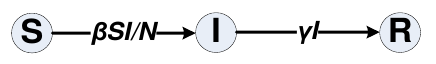

και περιγράφεται από το σύνολο διαφορικών εξισώσεων

$\frac{dS}{dt} = -\frac{\beta S I}{N}$

$\frac{dI}{dt} = \frac{\beta S I}{N} - \gamma I$

$\frac{dR}{dt} = \gamma I$

Για τις παραμέτρους που φαίνονται στον ακόλουθο Πίνακα 3, να δείξετε σε κοινό διάγραμμα για κάθε συνδυασμό παραμέτρων, τα $S(t)$,$I(t)$,$R(t)$.Τι παρατηρείτε; Σχολιάστε τα αποτελέσματα σε σχέση με το βασικό ρυθμό αναπαραγωγής $R_0$.

<table style=width:60%>
<tr>
    <th style=text-align:center>Παράμετροι</th>
    <th style=text-align:center colspan='6'>Τιμές</th>
</tr>
<tr>
    <td style=text-align:center>$\beta$</td>
     <td style=text-align:center colspan='6'>$10^{-3}$</td>
</tr>
<tr>
    <td style=text-align:center>$\gamma$</td>
    <td style=text-align:center>$10^{-6}$</td>
    <td style=text-align:center>$10^{-5}$</td>
    <td style=text-align:center>$10^{-4}$</td>
    <td style=text-align:center>$10^{-3}$</td>
    <td style=text-align:center>$10^{-2}$</td>
    <td style=text-align:center>$10^{-1}$</td>
</tr>
<tr>
    <td style=text-align:center>$S(0)$</td>
    <td style=text-align:center colspan='6'>$5x0$</td>
</tr>
<tr>
    <td style=text-align:center>$I(0)$</td>
    <td style=text-align:center colspan='6'>$1x$</td>
</tr>
    <tr>
    <td style=text-align:center>$R(0)$</td>
    <td style=text-align:center colspan='6'>$0$</td>
</tr>
</table>

In [19]:
# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

def solve_SIR(g):
    I0 = 15
    R0 = 0
    S0 = 550
    N = S0 + I0 + R0 #total population, N.
    beta = 10**(-3)  #Contact rate, beta
    gamma = 10**(-g) #mean recovery rate, gamma, (in 1/days)
    t = np.linspace(0, 55000, 200000) # A grid of time points (in days)
    
    # Initial conditions vector
    y0 = S0, I0, R0
    # Integrate the SIR equations over the time grid, t.
    ret = odeint(deriv, y0, t, args=(N, beta, gamma))
    S, I, R = ret.T

    # Plot the data on three separate curves for S(t), I(t) and R(t)
    fig = plt.figure(facecolor='w')
    ax = fig.add_subplot(111, axisbelow=True)
    ax.plot(t, S/N, 'b', alpha=0.5, lw=2, label='Susceptible')
    ax.plot(t, I/N, 'r', alpha=0.5, lw=2, label='Infected')
    ax.plot(t, R/N, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
    ax.set_xlabel('Time /days')
    ax.set_ylabel('Number (1000s)')
    ax.set_ylim(0,1.2)
    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    ax.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)
    plt.show()  



gamma = 10^(-6)


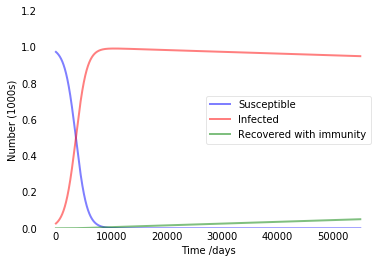

gamma = 10^(-5)


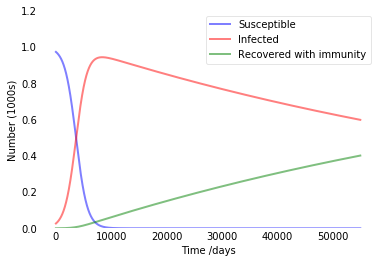

gamma = 10^(-4)


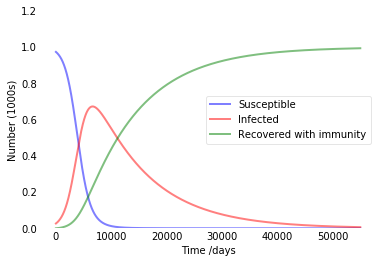

gamma = 10^(-3)


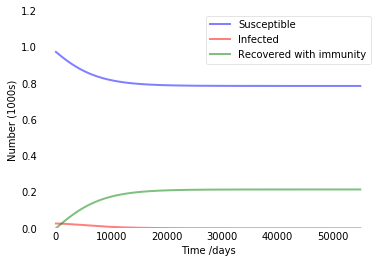

gamma = 10^(-2)


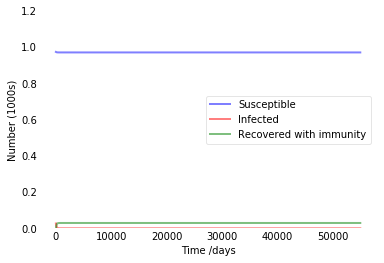

gamma = 10^(-1)


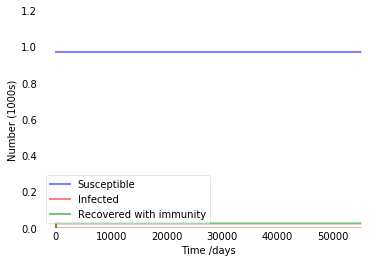

In [20]:
print("gamma = 10^(-6)")
solve_SIR(6)
print("gamma = 10^(-5)")
solve_SIR(5)
print("gamma = 10^(-4)")
solve_SIR(4)
print("gamma = 10^(-3)")
solve_SIR(3)
print("gamma = 10^(-2)")
solve_SIR(2)
print("gamma = 10^(-1)")
solve_SIR(1)

#### Σχολιασμός SIR

Παρατηρούμε ότι όσο αυξάνεται το $γ$, τόσο πιο γρήγορα αυξάνεται και το $R$, με αποτέλεσμα να μειώνεται πιο γρήγορα ο αριθμών των $I$ (αυτό γίνεται πιο εμφανές για τιμές του γ = $10^{-6}$, $10^{-5}$, $10^{-4}$). Για τις υπόλοιπες τιμές ($10^{-3}$, $10^{-2}$, $10^{-1}$), ο ρυθμός αύξησης του αριθμού των $R$ είναι τόσο μεγάλος, που ουσιαστικά ο αριθμός των $I$ γίνεται σχεδόν μηδενικός έως και αμελητέος.

#### Άσκηση 2: SIS

Για το μοντέλο SIS, υιοθετείται η περίπτωση περιοδικού ρυθμού επαφής κόμβων. Κάτι τέτοιο μπορεί να αντιστοιχεί σε μια περιοδικότητα στη λήψη επιδημιών, πχ. σε ετήσια βάση όπως με τον συνιθισμένο ιό της γρίπης. Το σύνολο των διαφορικών εξισώσεων το οποίο περιγράφει αυτό το μοντέλο είναι:

$\frac{dI}{dt} = (\beta(t)N-a)I - \beta(t)I^2$

$\beta(t) = 2-1.8\cos(5t)$

Για τους συνδυασμούς παραμέτρων που φαίνονται στον ακόλουθο πίνακα, να δείξετε σε κοινό διάγραμμα την εξέλιξη του φαινομένου για κάθε συνδιασμό τιμών ($I(t),\beta(t))$

<table style=width:60%>
<tr>
    <th style=text-align:center>Παράμετροι</th>
    <th style=text-align:center colspan='6'>Τιμές</th>
</tr>
<tr>
    <td style=text-align:center>$\alpha$</td>
    <td style=text-align:center>$6$</td>
    <td style=text-align:center>$5$</td>
    <td style=text-align:center>$4$</td>
    <td style=text-align:center>$3$</td>
    <td style=text-align:center>$2$</td>
    <td style=text-align:center>$1$</td>
</tr>
<tr>
    <td style=text-align:center>$N$</td>
    <td style=text-align:center colspan='6'>$1$</td>
</tr>
</table>

In [61]:
def beta(t):
    r = 2 - 1.8*np.cos(5*t);
    return r

def deriv2(y, t, N, alpha):
    I, S = y
    dIdt = ((beta(t) * N - alpha) * I) - beta(t)*(I**2)
    dSdt = -dIdt
    return dIdt,dSdt

def solve_SIS(g):
    N = 565 #population percentage
    I0 = 15
    S0 = 550
    alpha = g
    t = np.linspace(0, 4, 200) #time points

    # Initial conditions vector
    y0 = I0, S0
    # Integrate the SIR equations over the time grid, t.
    ret = odeint(deriv2, y0, t, args=(N, alpha))
    I, S = ret.T

    # Plot the data on three separate curves for S(t), I(t)
    fig = plt.figure(facecolor='w')
    ax = fig.add_subplot(111, axisbelow=True)
    ax.plot(t, S/N, 'b', alpha=0.5, lw=2, label='Susceptible')
    ax.plot(t, I/N, 'r', alpha=0.5, lw=2, label='Infected')
    ax.set_xlabel('Time /days')
    ax.set_ylabel('Number ('+str(565)+'s)')
    ax.set_ylim(0,1.2)
    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    ax.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)
    plt.show()  

alpha = 6


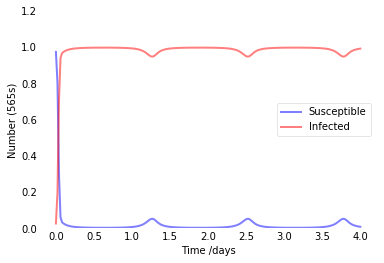

alpha = 5


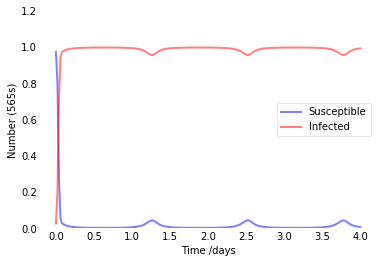

alpha = 4


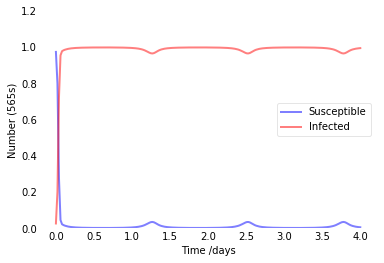

alpha = 3


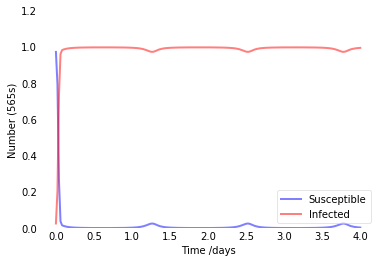

alpha = 2


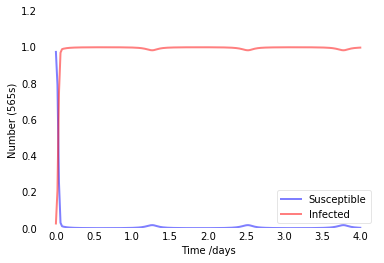

alpha = 1


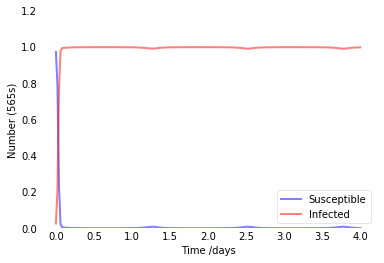

In [62]:
print("alpha = 6")
solve_SIS(6)
print("alpha = 5")
solve_SIS(5)
print("alpha = 4")
solve_SIS(4)
print("alpha = 3")
solve_SIS(3)
print("alpha = 2")
solve_SIS(2)
print("alpha = 1")
solve_SIS(1)

#### Σχολιασμός SIS

Γενικά παρατηρούμε μια περιοδική συμπεριφορά στους αριθμούς των $Ι$ και $S$, λογικό εφόσον η παράμετρος $β$ μεταβάλλεται αρμονικά. Επίσης, βλέπουμε ότι όσο αυξάνεται η παράμετρος $α$, γίνεται πιο δύσκολο να γίνει κάποιος Suspectible ανά περιόδους. Αυτό οφείλεται στο ότι το $α$ βρίσκεται στον πρώτο όρο της διαφορικής εξίσωσης του $I$ και όσο αυξάνεται προκαλεί τη μείωση του ρυθμού μεταβολής του $I$ (και του $S$ ανάλογα)